Same thing as `dense9.ipynb` except the classes are better balanced out. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle

# load in labels and samples for the training subset
training_samples_file = open('/content/drive/MyDrive/Mignot Lab Research/Experiments/one_sample/nine_seconds/train_samples.pkl', 'rb')
training_labels_file = open('/content/drive/MyDrive/Mignot Lab Research/Experiments/one_sample/nine_seconds/train_labels.pkl', 'rb')

# load in labels and samples for the test subset
test_samples_file = open('/content/drive/MyDrive/Mignot Lab Research/Experiments/one_sample/nine_seconds/test_samples.pkl', 'rb')
test_labels_file = open('/content/drive/MyDrive/Mignot Lab Research/Experiments/one_sample/nine_seconds/test_labels.pkl', 'rb')

In [3]:
# training
X = pickle.load(training_samples_file)
y = pickle.load(training_labels_file)

# test
test_samples = pickle.load(test_samples_file)
test_labels = pickle.load(test_labels_file)

In [4]:
len(X)

2939

In [11]:
counter = 0
for elem in y:
  if elem == 1:
    counter += 1

In [8]:
counter

140

In [14]:
new_x = X[:280]

In [15]:
len(new_x)

280

In [16]:
new_y = y[:280]

In [17]:
len(new_y)

280

In [18]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(128, 431)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
]) 

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 55168)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               7061632   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 7,061,890
Trainable params: 7,061,890
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
history = model.fit(new_x, new_y, epochs=250)

Epoch 1/250
9/9 [==============================] - 2s 6ms/step - loss: 0.5742 - accuracy: 0.4488
Epoch 2/250
9/9 [==============================] - 0s 6ms/step - loss: 0.3629 - accuracy: 0.9750
Epoch 3/250
9/9 [==============================] - 0s 6ms/step - loss: 0.3449 - accuracy: 0.9993
Epoch 4/250
9/9 [==============================] - 0s 6ms/step - loss: 0.3201 - accuracy: 0.9965
Epoch 5/250
9/9 [==============================] - 0s 6ms/step - loss: 0.3387 - accuracy: 0.9984
Epoch 6/250
9/9 [==============================] - 0s 6ms/step - loss: 0.3439 - accuracy: 0.9989
Epoch 7/250
9/9 [==============================] - 0s 6ms/step - loss: 0.3249 - accuracy: 0.9908
Epoch 8/250
9/9 [==============================] - 0s 6ms/step - loss: 0.3215 - accuracy: 1.0000
Epoch 9/250
9/9 [==============================] - 0s 5ms/step - loss: 0.2986 - accuracy: 1.0000
Epoch 10/250
9/9 [==============================] - 0s 6ms/step - loss: 0.3095 - accuracy: 1.0000
Epoch 11/250
9/9 [===========

In [22]:
history_dict = history.history
print(history_dict.keys())
# to keep for later 
%store history_dict

dict_keys(['loss', 'accuracy'])
Stored 'history_dict' (dict)


In [23]:
# imports 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

In [24]:
# function to plot training given history dictionary 
def plot_training(history_dict):
	"""
	Plots the training accuracy and loss graphs for a Keras model (validation graphs not included). 
	Parameters:
		- history_dict: a dictionary of "history" object from Keras 
	"""
	# plot training accuracy graph 
	plt.plot(history_dict['accuracy'])
	plt.title('Training Accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train'], loc='upper left')
	plt.show()

	# plot training loss graph 
	plt.plot(history_dict['loss'])
	plt.title('Training Loss')
	plt.ylabel('loss')
	plt.xlabel('epoch')
	plt.legend(['train'], loc='upper left')
	plt.show()

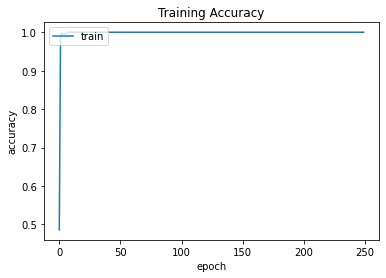

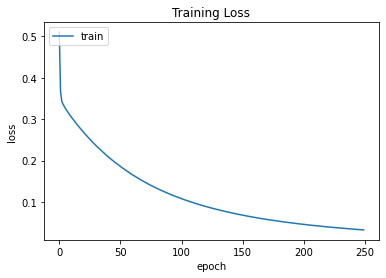

In [25]:
plot_training(history_dict)

In [26]:
test_loss, test_accuracy = model.evaluate(test_samples,  test_labels, verbose=2)
print('Test accuracy:', test_accuracy)

11/11 - 0s - loss: 2.8371 - accuracy: 0.9021
Test accuracy: 0.9021406769752502


In [27]:
predictions = model.predict_classes(test_samples) # generates a list of predictions

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [28]:
print("Test labels: \n", test_labels)
print("Test predictions: \n", predictions)

Test labels: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Test predictions: 
 [1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 

In [29]:
correct = 0
for i in range(len(predictions)):
  if predictions[i] == test_labels[i]:
    correct += 1

In [30]:
predictions_accuracy = correct/len(test_labels)
predictions_accuracy

0.9021406727828746

In [31]:
print("The accuracy is: " + str(round(predictions_accuracy * 100, 1)) + "%")

The accuracy is: 90.2%


In [32]:
speech_correct = 0
for i in range(len(test_labels[:16])):
    if predictions[i] == test_labels[i]:
      speech_correct += 1

In [33]:
speech_correct/len(test_labels[:16])

0.875

WAY BETTER! Class imbalance was the problem! 